<a href="https://colab.research.google.com/github/purvadua/IBM_312-CC_Prediction/blob/main/Concrete_Compressive_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Loading the Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Concrete_Data.xls to Concrete_Data (1).xls


In [ ]:
import io
df2 = pd.read_excel(io.BytesIO(uploaded['Concrete_Data.xls']))

In [ ]:
df2.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df2.shape

(1030, 9)

In [ ]:
  col_names = ["Cement", "BlastFurnaceSlag", "Fly_Ash", "Water","Superplasticizer", "Coarse_Aggregate","Fine_Aggregate", "Age", "CC_strength"]
  curr_names = list(df2.columns)

  mapper = {}
  for i,name in enumerate(curr_names):
    mapper[name] = col_names[i]

  df2 = df2.rename(columns=mapper)

In [ ]:
df2.head()

,Cement,BlastFurnaceSlag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,CC_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   Fly_Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse_Aggregate  1030 non-null   float64
 6   Fine_Aggregate    1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CC_strength       1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**Inference:
The data has no missing values. Also all the features have interger values, i.e. we have Numerical Data only. 

**EDA**

In [ ]:
df2.describe()

,Cement,BlastFurnaceSlag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,CC_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
corr = df2.corr()
corr

,Cement,BlastFurnaceSlag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,CC_strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
BlastFurnaceSlag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly_Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine_Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
CC_strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


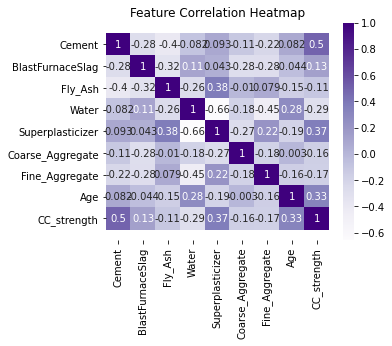

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='Purples')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


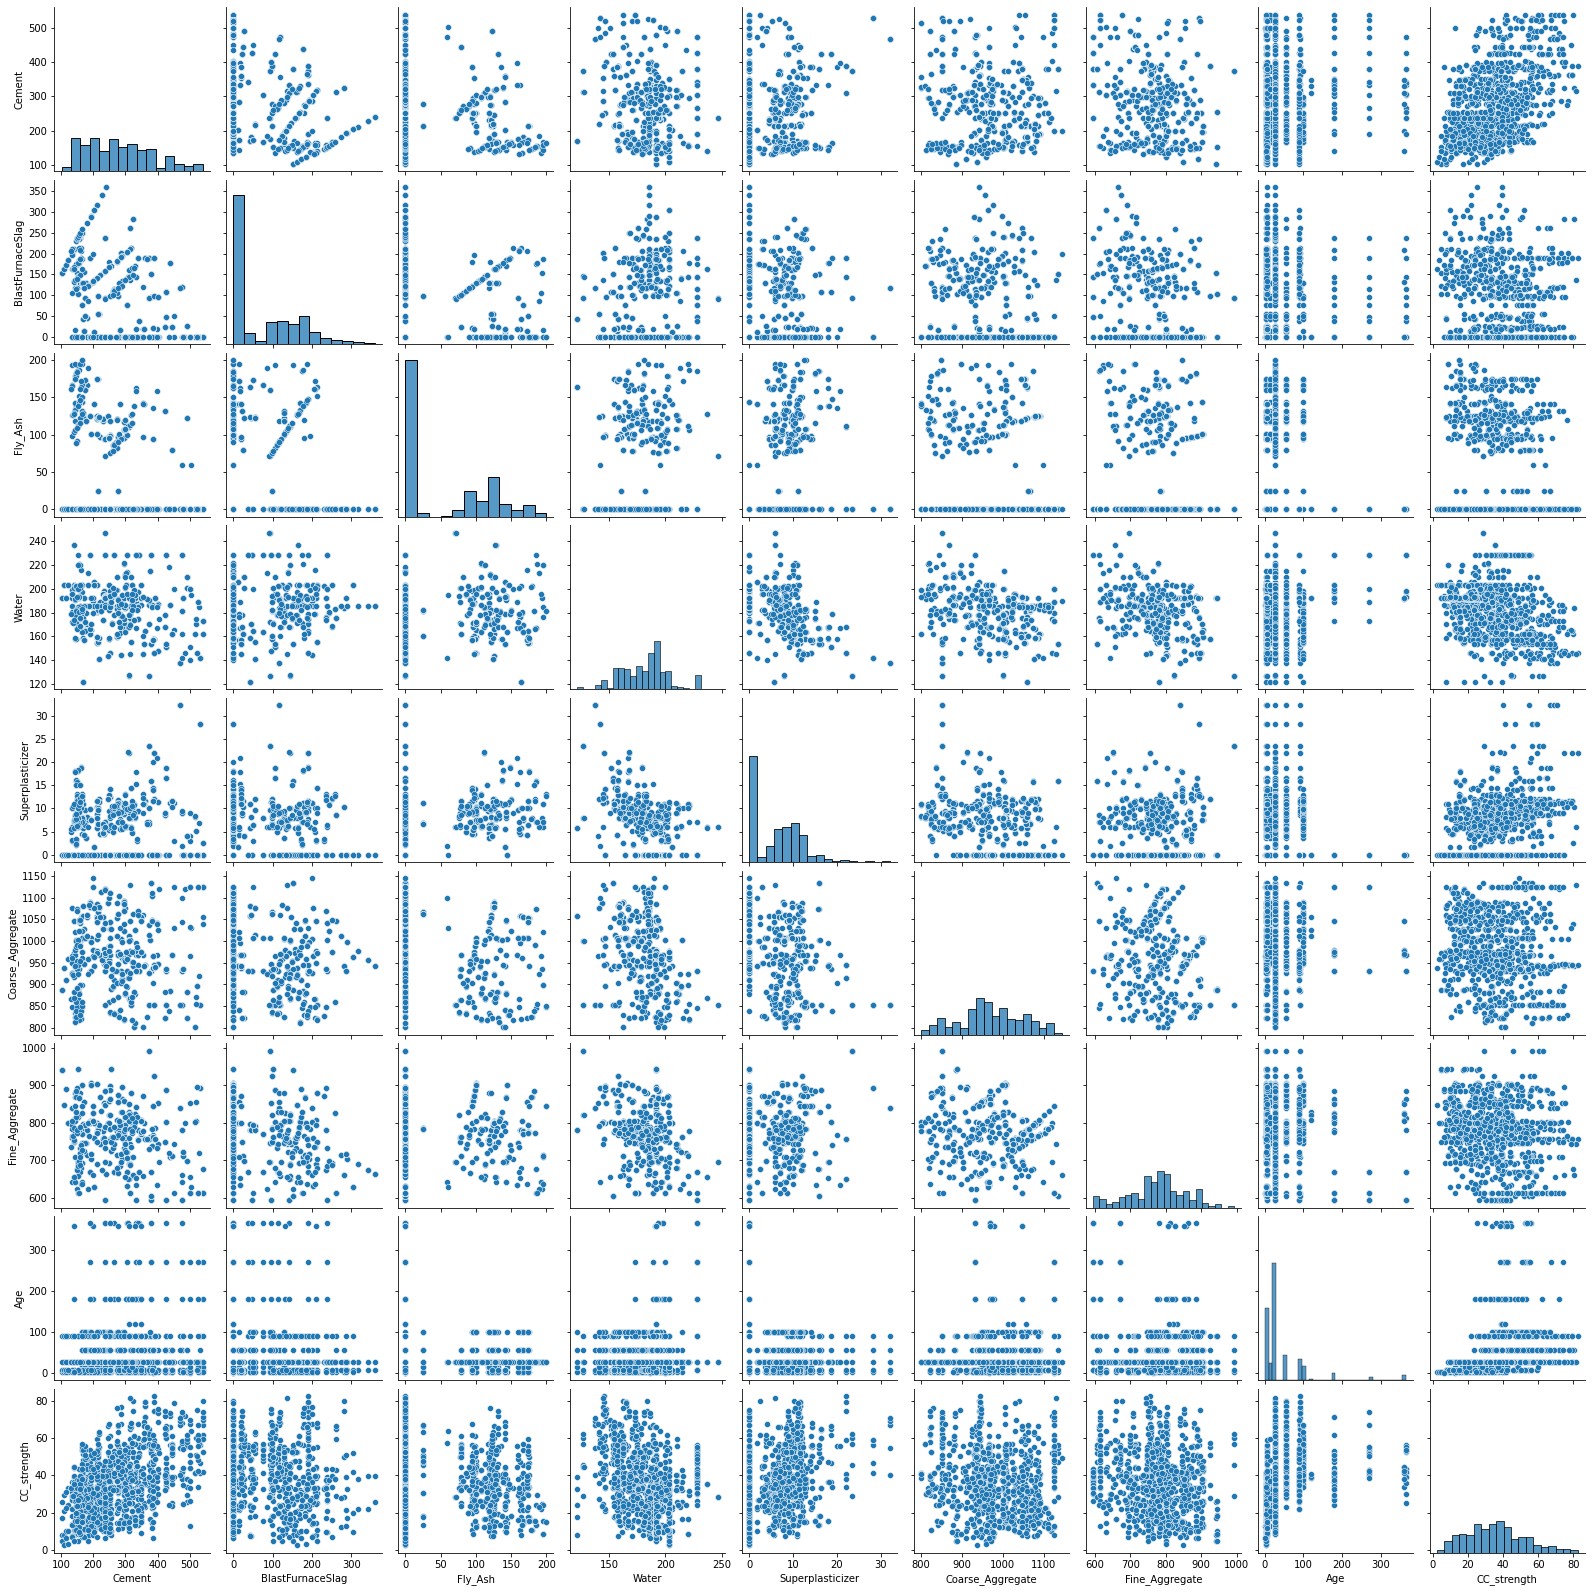

In [ ]:
sns.pairplot(df2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compressive Strength Distribution')

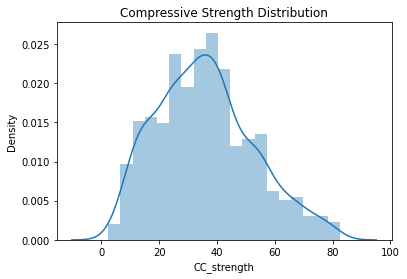

In [ ]:
ax = sns.distplot(df2.CC_strength)
ax.set_title("Compressive Strength Distribution")

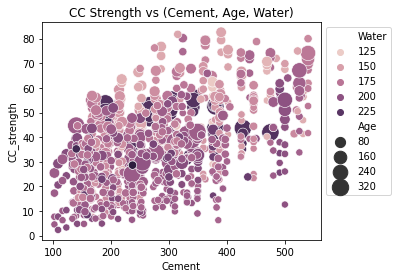

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
sns.scatterplot(data=df2, x="Cement",y='CC_strength', hue="Water", size="Age",  ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

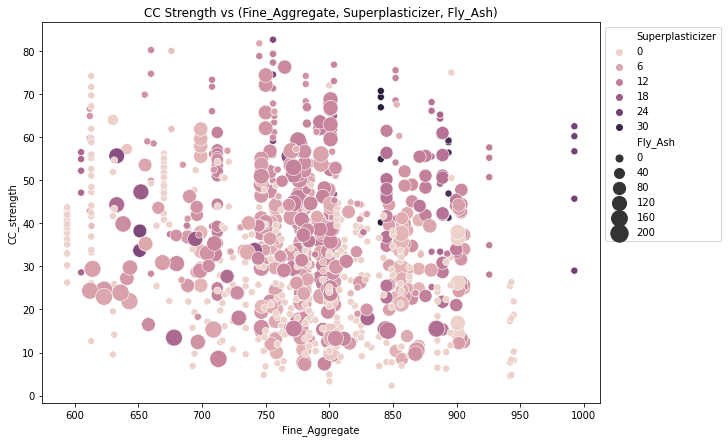

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df2, x="Fine_Aggregate",y='CC_strength', hue="Superplasticizer", size="Fly_Ash",  ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine_Aggregate, Superplasticizer, Fly_Ash)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

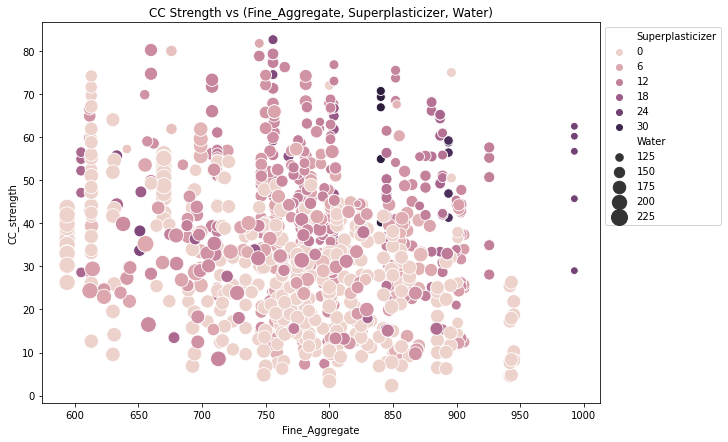

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df2, x="Fine_Aggregate",y='CC_strength', hue="Superplasticizer", size="Water",  ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine_Aggregate, Superplasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

**Case 1**
Directly Applying models without much Feature Engineering.


In [ ]:
from scipy.stats import zscore
concrete_df_z = df2.apply(zscore)
concrete_df_z= pd.DataFrame(concrete_df_z,columns=df2.columns)

In [ ]:
X=concrete_df_z.iloc[:,:-1]
y=concrete_df_z.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


1.1 Linear Resgression


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn import metrics
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_lr = lr.predict(X_test)
# performance on train data
print('Performance on training data using LR:',lr.score(X_train,y_train))
# performance on test data
print('Performance on testing data using LR:',lr.score(X_test,y_test))
#Evaluate the model using accuracy
acc_LR = metrics.r2_score(y_test, y_pred_lr)
print('Accuracy LR: ',acc_LR)
mse_LR = metrics.mean_squared_error(y_test, y_pred_lr)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_lr))

Performance on training data using LR: 0.6108229424520566
Performance on testing data using LR: 0.6234144623633202
Accuracy LR:  0.6234144623633202
MSE:  0.34397819545081465


In [ ]:
results = pd.DataFrame({'Method':['Linear Regression'], 'accuracy': acc_LR, 'MSE': mse_LR},index={'1'})
results = results[['Method', 'accuracy','MSE']]
results

,Method,accuracy,MSE
1,Linear Regression,0.623414,0.343978


1.2 KNN

In [129]:
from sklearn.neighbors import KNeighborsRegressor
import sklearn.preprocessing
classifier=KNeighborsRegressor(n_neighbors=4)
classifier.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [130]:
y_pred_knn =classifier.predict(X_test)

In [131]:
# performance on train data
print('Performance on training data using KNN:',classifier.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNN:',classifier.score(X_test,y_test))
#Evaluate the model using accuracy
acc_KNN = metrics.r2_score(y_test, y_pred_knn)
print('Accuracy LR: ',acc_KNN)
mse_KNN = metrics.mean_squared_error(y_test, y_pred_knn)
print('MSE: ',mse_KNN)

Performance on training data using KNN: 0.8855596713271305
Performance on testing data using KNN: 0.7498110000288767
Accuracy LR:  0.7498110000288767
MSE:  0.23520208634619186


In [ ]:
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': acc_KNN,'MSE': mse_KNN},index={'2'})
results = pd.concat([results, tempResultsDf])
# results = results[['Method', 'accuracy','mse']]
results

,Method,accuracy,MSE
1,Linear Regression,0.623414,0.343978
2,KNN Regressor,0.680054,0.292243


1.3 Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold


In [ ]:
model2 = SVR(kernel = 'linear')
model2.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = model2.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model2.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model2.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S =metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
mse_R= metrics.mean_squared_error(y_test, y_pred)
print('MSE: ',mse_R)

Performance on training data using SVR: 0.584563589445209
Performance on testing data using SVR: 0.6147817196062808
Accuracy SVR:  0.6147817196062808
MSE:  0.3518634565099431


In [ ]:
tempResultsDf = pd.DataFrame({'Method':['SV_Regressor'], 'accuracy': acc_S,'MSE': mse_R},index={'3'})
results = pd.concat([results, tempResultsDf])
# results = results[['Method', 'accuracy','mse']]
results

,Method,accuracy,MSE
1,Linear Regression,0.623414,0.343978
2,KNN Regressor,0.680054,0.292243
3,SV_Regressor,0.614782,0.351863


1.4 Ensemble Model

In [ ]:
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [ ]:
from sklearn.ensemble import VotingRegressor
ensemble =VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='linear',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False))],
                n_jobs=None, weights=None)

In [ ]:
y_pred_evc = ensemble.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',ensemble.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',ensemble.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred_evc)
print('Accuracy ensemble: ',acc_E)
mse_E = metrics.mean_squared_error(y_test, y_pred_evc)
print('MSE: ',mse_E)

Performance on training data using ensemble: 0.7511632287919945
Performance on testing data using ensemble: 0.7016865160888984
Accuracy ensemble:  0.7016865160888983
MSE:  0.2724834695414807


In [ ]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': acc_E,'MSE': mse_E},index={'4'})
results = pd.concat([results, tempResultsDf])
# results = results[['Method', 'accuracy','mse']]
results

,Method,accuracy,MSE
1,Linear Regression,0.623414,0.343978
2,KNN Regressor,0.680054,0.292243
3,SV_Regressor,0.614782,0.351863
4,Ensemble,0.701687,0.272483


**Case 2** Featuring Engineering

In [ ]:
concrete_df = df2
concrete_df

,Cement,BlastFurnaceSlag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,CC_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


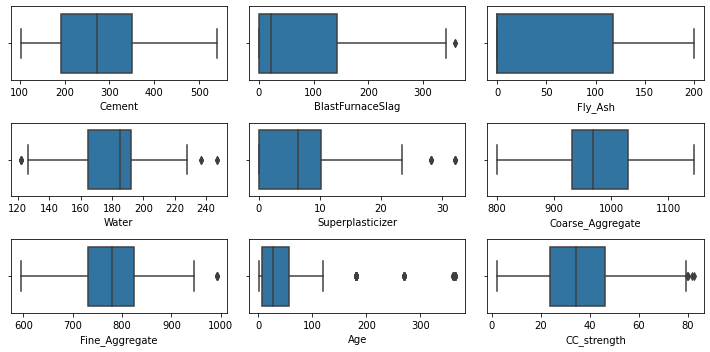

In [ ]:
#Box Plot 
names = list(concrete_df.columns)
f, axes = plt.subplots(round(len(names)/3), 3,figsize=(10,5))  
y = 0;
for name in names:
    i, j = divmod(y, 3)
    sns.boxplot(x=concrete_df[name], ax=axes[i, j])
    y = y + 1

plt.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

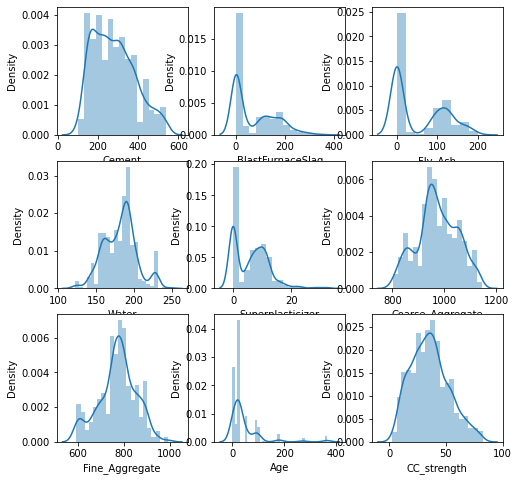

In [ ]:
# Distplot 
fig, ax2 = plt.subplots(3, 3, figsize=(8, 8))
sns.distplot(concrete_df['Cement'],ax=ax2[0][0])
sns.distplot(concrete_df['BlastFurnaceSlag'],ax=ax2[0][1])
sns.distplot(concrete_df['Fly_Ash'],ax=ax2[0][2])
sns.distplot(concrete_df['Water'],ax=ax2[1][0])
sns.distplot(concrete_df['Superplasticizer'],ax=ax2[1][1])
sns.distplot(concrete_df['Coarse_Aggregate'],ax=ax2[1][2])
sns.distplot(concrete_df['Fine_Aggregate'],ax=ax2[2][0])
sns.distplot(concrete_df['Age'],ax=ax2[2][1])
sns.distplot(concrete_df['CC_strength'],ax=ax2[2][2])

Handling Outliers using Box Plots

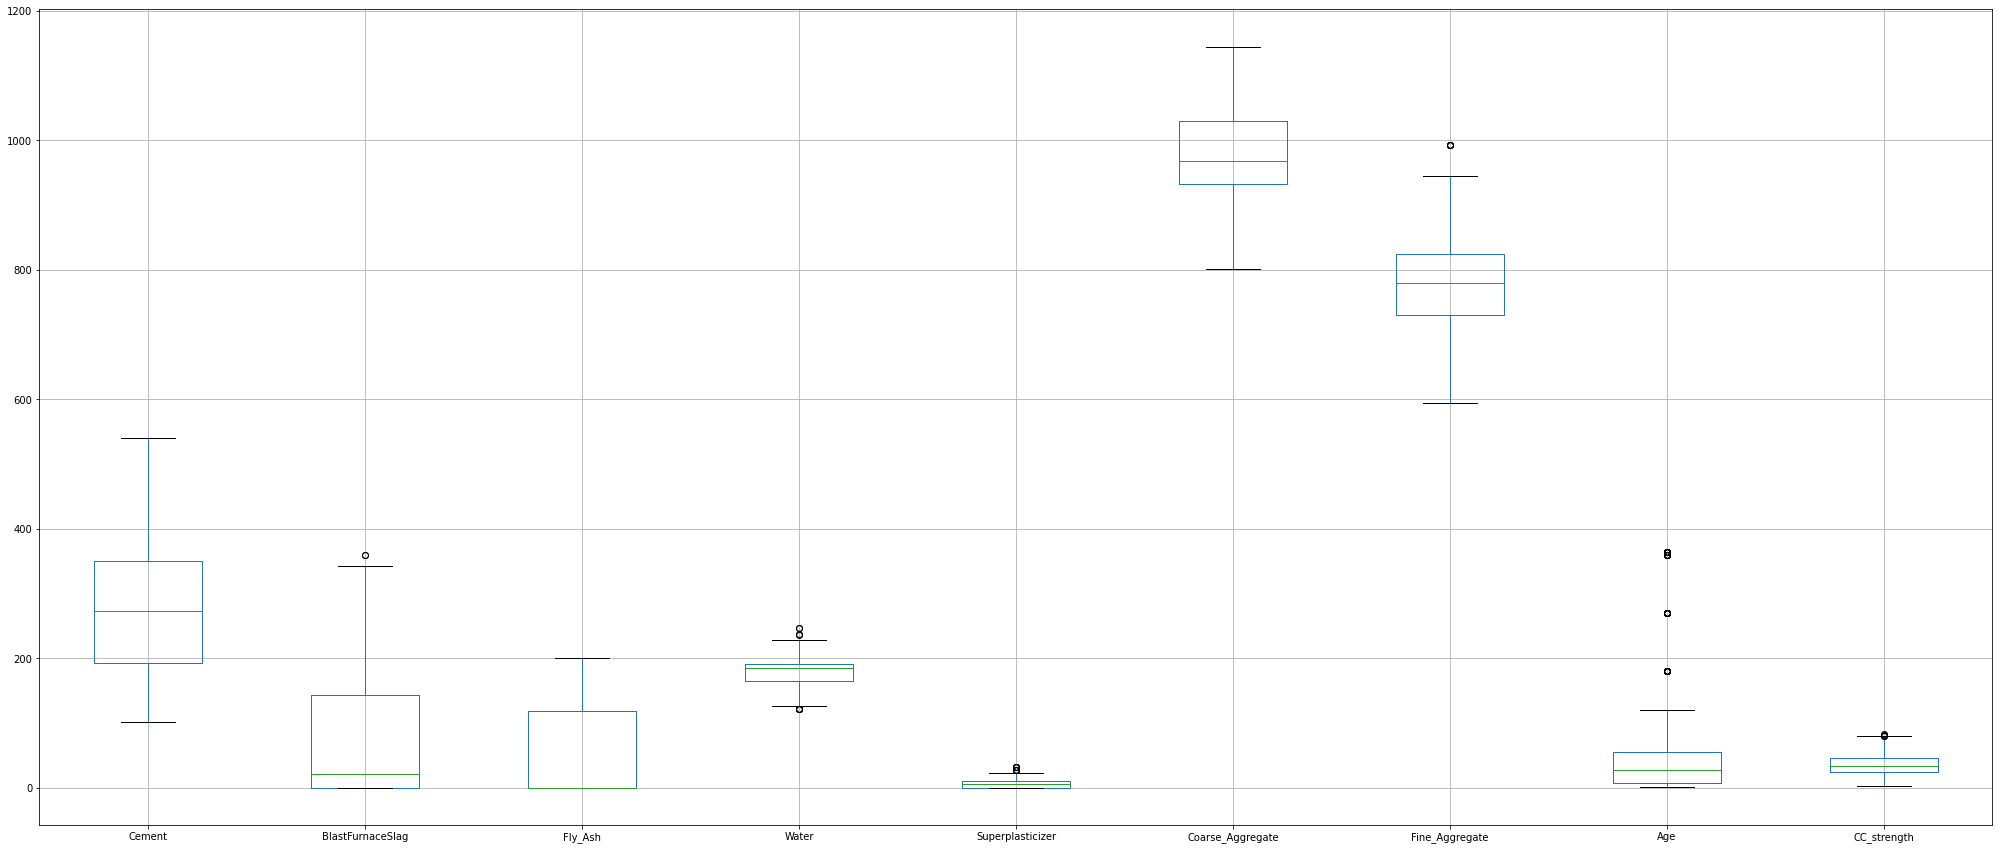

In [ ]:
concrete_df1=concrete_df.copy()
concrete_df1.boxplot(figsize=(35,15))

In [ ]:
# No of outliers in each column  "BlastFurnaceSlag", "Fly_Ash", "Water","Superplasticizer", "Coarse_Aggregate","Fine_Aggregate", "Age", "CC_strength"]
print('Number of outliers in Cement: ',concrete_df1[((concrete_df1.Cement - concrete_df1.Cement.mean()) / concrete_df1.Cement.std()).abs() >3]['Cement'].count())
print('Number of outliers in BlastFurnaceSlag: ',concrete_df1[((concrete_df1.BlastFurnaceSlag - concrete_df1.BlastFurnaceSlag.mean()) / concrete_df1.BlastFurnaceSlag.std()).abs() >3]['BlastFurnaceSlag'].count())
print('Number of outliers in Water: ',concrete_df1[((concrete_df1.Water - concrete_df1.Water.mean()) / concrete_df1.Water.std()).abs() >3]['Water'].count())
print('Number of outliers in Superplasticizer: ',concrete_df1[((concrete_df1.Superplasticizer - concrete_df1.Superplasticizer.mean()) / concrete_df1.Superplasticizer.std()).abs() >3]['Superplasticizer'].count())
print('Number of outliers in Age: ',concrete_df1[((concrete_df1.Age - concrete_df1.Age.mean()) / concrete_df1.Age.std()).abs() >3]['Age'].count())
print('All other columns has zero outliers.')

Number of outliers in Cement:  0
Number of outliers in BlastFurnaceSlag:  4
Number of outliers in Water:  2
Number of outliers in Superplasticizer:  10
Number of outliers in Age:  33
All other columns has zero outliers.


In [ ]:
#Handling the outliers by replacing them by MEDIAN
for col_name in concrete_df1.columns[:-1]:
    q1 = concrete_df1[col_name].quantile(0.25)
    q3 = concrete_df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df1.loc[(concrete_df1[col_name] < low) | (concrete_df1[col_name] > high), col_name] = concrete_df1[col_name].median()


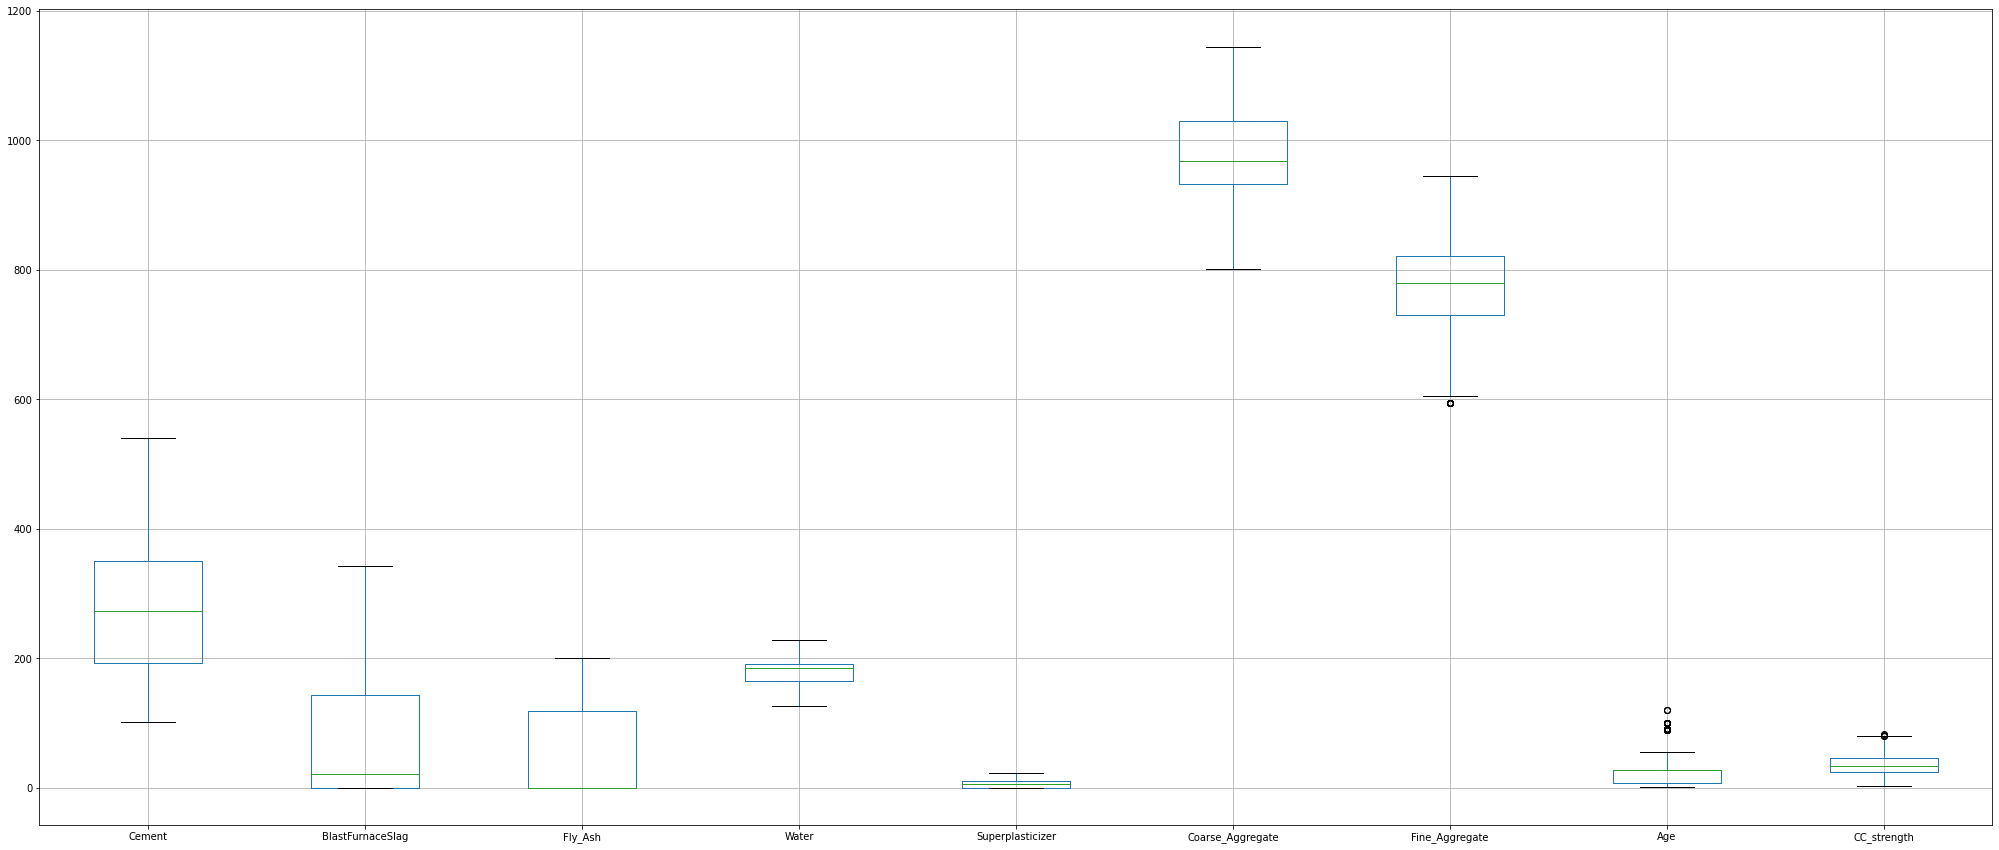

In [ ]:
concrete_df1.boxplot(figsize=(35,15))

In [ ]:
#Scaling the dataset using the zscore to scale
from scipy.stats import zscore
concrete_df_z = concrete_df1.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df.columns)

In [ ]:
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

2.1 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_lr = lr.predict(X_test)
# performance on train data
print('Performance on training data using LR:',lr.score(X_train,y_train))
# performance on test data
print('Performance on testing data using LR:',lr.score(X_test,y_test))
#Evaluate the model using accuracy
acc_LR = metrics.r2_score(y_test, y_pred_lr)
print('Accuracy LR: ',acc_LR)
mse_LR = metrics.mean_squared_error(y_test, y_pred_lr)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_lr))

Performance on training data using LR: 0.7349042149912917
Performance on testing data using LR: 0.6641092873395682
Accuracy LR:  0.6641092873395682
MSE:  0.3157700634766565


In [ ]:
results2 = pd.DataFrame({'Method':['Linear Regression'], 'accuracy': acc_LR, 'MSE': mse_LR},index={'1'})
results2 = results2[['Method', 'accuracy','MSE']]
results2

,Method,accuracy,MSE
1,Linear Regression,0.664109,0.31577


2.2 KNN Regressor

In [ ]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

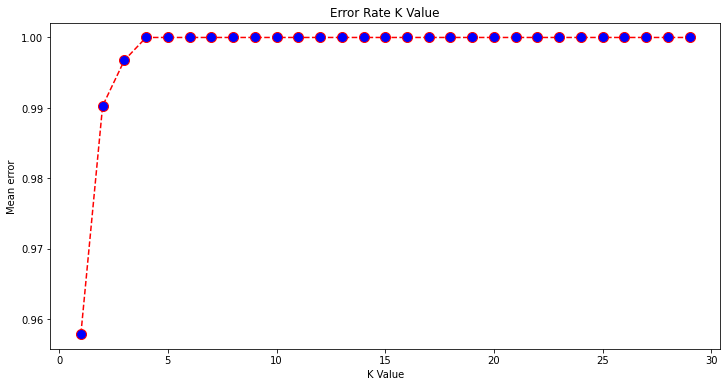

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [136]:
#K=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [137]:
y_pred_knn = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K= metrics.r2_score(y_test, y_pred_knn)
print('Accuracy KNNR: ',acc_K)
mse_K = metrics.mean_squared_error(y_test, y_pred_knn)
print('MSE: ',mse_K)

Performance on training data using KNNR: 0.9077349021190544
Performance on testing data using KNNR: 0.7531876240068422
Accuracy KNNR:  0.7531876240068422
MSE:  0.2320277301414197


In [ ]:
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': acc_K,'MSE': mse_K},index={'2'})
results2 = pd.concat([results2, tempResultsDf])
# results = results[['Method', 'accuracy','mse']]
results2

,Method,accuracy,MSE
1,Linear Regression,0.664109,0.315770
2,KNN Regressor,0.753188,0.232028


2.3 Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold


In [ ]:
model2 = SVR(kernel = 'linear')
model2.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = model2.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model2.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model2.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S =metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
mse_R= metrics.mean_squared_error(y_test, y_pred)
print('MSE: ',mse_R)

Performance on training data using SVR: 0.7310137311798479
Performance on testing data using SVR: 0.6550362388005978
Accuracy SVR:  0.6550362388005978
MSE:  0.32429961492029474


In [ ]:
tempResultsDf = pd.DataFrame({'Method':['SV_Regressor'], 'accuracy': acc_S,'MSE': mse_R},index={'3'})
results2 = pd.concat([results2, tempResultsDf])
# results = results[['Method', 'accuracy','mse']]
results2

,Method,accuracy,MSE
1,Linear Regression,0.664109,0.315770
2,KNN Regressor,0.753188,0.232028
3,SV_Regressor,0.655036,0.324300


2.4 Ensemble LR, KNN, SVR

In [ ]:
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
ensemble =VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='linear',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False))],
                n_jobs=None, weights=None)

In [ ]:
y_pred_evc = ensemble.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',ensemble.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',ensemble.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred_evc)
print('Accuracy ensemble: ',acc_E)
mse_E = metrics.mean_squared_error(y_test, y_pred_evc)
print('MSE: ',mse_E)

Performance on training data using ensemble: 0.8346749762817984
Performance on testing data using ensemble: 0.7363285319501995
Accuracy ensemble:  0.7363285319501995
MSE:  0.24787692265620875


In [ ]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': acc_E,'MSE': mse_E},index={'4'})
results2 = pd.concat([results2, tempResultsDf])
# results = results[['Method', 'accuracy','mse']]
results2

,Method,accuracy,MSE
1,Linear Regression,0.664109,0.315770
2,KNN Regressor,0.753188,0.232028
3,SV_Regressor,0.655036,0.324300
4,Ensemble,0.736329,0.247877


In [ ]:
final_results = pd.concat([results, results2], axis=1)

In [ ]:
final_results

,Method,accuracy,MSE,Method,accuracy,MSE
1,Linear Regression,0.623414,0.343978,Linear Regression,0.664109,0.315770
2,KNN Regressor,0.680054,0.292243,KNN Regressor,0.753188,0.232028
3,SV_Regressor,0.614782,0.351863,SV_Regressor,0.655036,0.324300
4,Ensemble,0.701687,0.272483,Ensemble,0.736329,0.247877
